In [133]:
import pandas as pd
import numpy as np

df = pd.read_parquet('../frequentation_data.parquet')

mois_fr_to_en = {
    'janvier': 'January', 'février': 'February', 'mars': 'March', 
    'avril': 'April', 'mai': 'May', 'juin': 'June', 
    'juillet': 'July', 'août': 'August', 'septembre': 'September', 
    'octobre': 'October', 'novembre': 'November', 'décembre': 'December'
}

def convert_fr_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    for fr, en in mois_fr_to_en.items():
        date_str = date_str.replace(fr, en)
    
    return pd.to_datetime(date_str, format='%d %B %Y')

df['Date Article'] = df['Date Article'].apply(convert_fr_date)


df = df.sort_values('Date Article', ascending=True)
df.head(30)

,Date Article,Période,Année Courante,Année Précédente,Évolution (%)
32,2023-08-02,juillet,18.38,13.79,33.3
26,2023-08-02,janvier,14.81,10.67,38.7
27,2023-08-02,février,18.02,13.02,38.4
28,2023-08-02,mars,15.80,13.29,18.8
29,2023-08-02,avril,18.49,13.80,34.0
30,2023-08-02,mai,13.69,11.17,22.6
34,2023-08-02,année glissante (de août n-1 à juillet n),174.15,155.96,11.7
33,2023-08-02,sept premiers mois,108.99,86.87,25.5
31,2023-08-02,juin,9.81,11.13,-11.8
130,2023-09-04,avril,18.49,13.80,34.0


In [134]:
df.dtypes

Date Article        datetime64[ns]
Période                     object
Année Courante             float64
Année Précédente           float64
Évolution (%)              float64
dtype: object

In [135]:
fr_mounth = {
    'janvier', 'février', 'mars', 
    'avril', 'mai', 'juin', 
    'juillet', 'août', 'septembre', 
    'octobre', 'novembre', 'décembre'
}

def make_mounth(x):
    if x["Période"] in fr_mounth:
        return x["Période"] + " " + str(x["Date Article"].year)
    else:
        return np.nan

df['mounth'] = df.apply(make_mounth, axis=1)

In [136]:
df.dropna(inplace=True)

In [137]:
df.drop('Date Article', axis=1, inplace=True)
df.drop('Période', axis=1, inplace=True)
df.drop('Évolution (%)', axis=1, inplace=True)

In [138]:
df.drop_duplicates(inplace=True)

In [139]:
df.head(10)

,Année Courante,Année Précédente,mounth
32,18.38,13.79,juillet 2023
26,14.81,10.67,janvier 2023
27,18.02,13.02,février 2023
28,15.80,13.29,mars 2023
29,18.49,13.80,avril 2023
30,13.69,11.17,mai 2023
31,9.81,11.13,juin 2023
134,15.91,10.46,août 2023
110,18.52,13.80,avril 2023
115,8.78,7.56,septembre 2023


In [140]:
df2 = df.copy()
df2['Année Courante']=df['Année Précédente']

In [141]:
df2.drop('Année Précédente', axis=1, inplace=True)

In [142]:
def precedant_year(x):
    year = int(x[-4:])-1
    return x[:-4] + str(year)

df2['mounth'] = df2['mounth'].apply(lambda x : precedant_year(x))

In [143]:
df.drop('Année Précédente', axis=1, inplace=True)
pd.concat([df,df2])

,Année Courante,mounth
32,18.38,juillet 2023
26,14.81,janvier 2023
27,18.02,février 2023
28,15.80,mars 2023
29,18.49,avril 2023
...,...,...
156,18.61,avril 2023
160,15.42,août 2023
137,13.71,janvier 2024
138,15.06,février 2024


In [144]:
df_final = df.groupby(['mounth']).mean()

In [145]:
df_final.reset_index(inplace=True)

In [146]:
mois_fr_to_en = {
    'janvier': 'January', 'février': 'February', 'mars': 'March', 
    'avril': 'April', 'mai': 'May', 'juin': 'June', 
    'juillet': 'July', 'août': 'August', 'septembre': 'September', 
    'octobre': 'October', 'novembre': 'November', 'décembre': 'December'
}

def convert_fr_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    for fr, en in mois_fr_to_en.items():
        date_str = date_str.replace(fr, en)
    
    return pd.to_datetime(date_str, format='%B %Y')

df_final['mounth'] = df_final['mounth'].apply(convert_fr_date)
df_final.sort_values('mounth', inplace=True)

In [147]:
df_final['box_office']=df_final['Année Courante']
df_final.drop('Année Courante', axis=1, inplace=True)

In [150]:
df_final.head(30)

,mounth,box_office
8,2023-01-01,14.810000
5,2023-02-01,18.020000
17,2023-03-01,15.800000
2,2023-04-01,18.513333
15,2023-05-01,13.743333
13,2023-06-01,10.113333
11,2023-07-01,18.270000
0,2023-08-01,15.685000
24,2023-09-01,8.860000
22,2023-10-01,13.860000


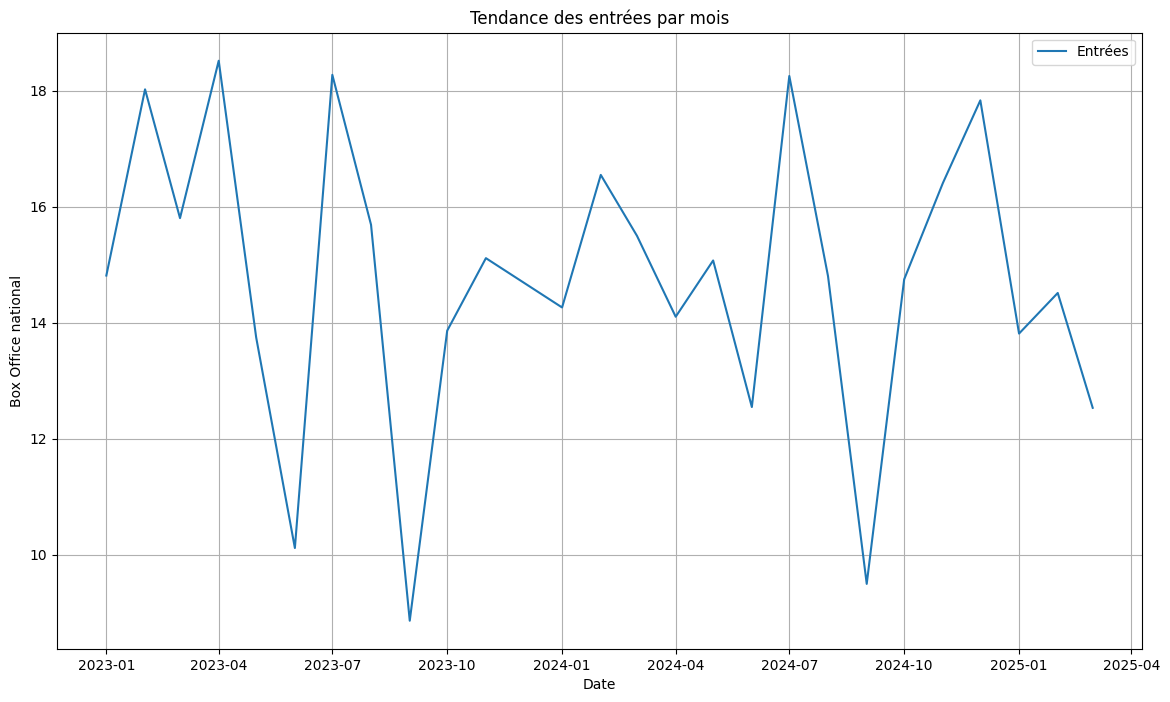

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(df_final['mounth'], df_final['box_office'])
plt.title('Tendance des entrées par mois')
plt.xlabel('Date')
plt.ylabel('Box Office national')
plt.legend(['Entrées'])
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

df = df_final
df['box_office'] = df['box_office'].astype(float)
df.set_index('month', inplace=True)